Ejemplo de regresión múltiple

In [2]:

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# Procesamiento de la biblioteca de datos
import numpy as np
import sklearn
import pandas as pd

import os
import sys
import time

import tensorflow as tf
from tensorflow import keras



In [3]:
from sklearn.datasets import fetch_california_housing
# Obtener conjunto de datos
housing = fetch_california_housing()
# Imprimir información del conjunto de datos
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
from sklearn.model_selection import train_test_split
# test_size se refiere a la relación entre el conjunto de entrenamiento dividido y el conjunto de prueba
# test_size El valor predeterminado es 0.25, lo que significa que los datos se dividen en cuatro partes y el conjunto de prueba ocupa una parte
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7, test_size = 0.25)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state = 11, test_size = 0.25)
# Imprime las dimensiones del conjunto de datos
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_valid.shape, y_valid.shape)

(11610, 8) (11610,)
(5160, 8) (5160,)
(3870, 8) (3870,)


In [5]:
# Normalización de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Los datos del conjunto de entrenamiento utilizan fit_transform, que es diferente de la transformación utilizada en el conjunto de validación y el conjunto de prueba
# fit_transform puede calcular la media y la varianza de los datos y registrarlos
# La media y la varianza utilizadas en el conjunto de validación y el conjunto de prueba son todos de los datos del conjunto de entrenamiento, por lo que la normalización de los dos se puede hacer usando transform
# La normalización es solo para los datos de entrada, la etiqueta permanece sin cambios
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
model2 = keras.models.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),
])


model1 = keras.models.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1),
])
model=model1
model.summary()

model.compile(loss="mean_squared_error", optimizer = keras.optimizers.SGD(0.001))
# La función de devolución de llamada usa EarlyStopping, la paciencia se establece en 5 y el umbral se establece en 1e-2
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train_scaled, y_train,
                   validation_data=(x_valid_scaled, y_valid),
                   epochs = 100,
                   callbacks= callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.9564 - val_loss: 0.9147
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7766 - val_loss: 0.7743
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6920 - val_loss: 0.7225
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6495 - val_loss: 0.6864
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6185 - val_loss: 0.6589
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5945 - val_loss: 0.6354
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5746 - val_loss: 0.6162
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5581 - val_loss: 0.5993
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5444 - val_loss: 0.5844
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5318 - val_lo

363/363 [==============================] - 0s 1ms/step - loss: 0.3484 - val_loss: 0.3666
Epoch 82/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3474 - val_loss: 0.3663
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3469 - val_loss: 0.3672
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3463 - val_loss: 0.3646
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3459 - val_loss: 0.3639
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3452 - val_loss: 0.3634
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3445 - val_loss: 0.3626
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3438 - val_loss: 0.3628
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3433 - val_loss: 0.3626
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3426 - val_loss: 

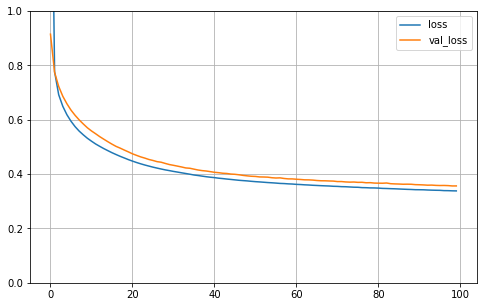

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

In [24]:
model.evaluate(x_test_scaled, y_test)


162/162 [==============================] - 0s 436us/step - loss: 0.3838


0.38380539417266846